In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
data_train=pd.read_csv(r"D:\thf\python\kaggle\Titanic\train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#数据规模：训练数据总共891
#数据特征：类型多样，包括文本：Name；文本+数字：Ticket, Cabin；类目：Sex，Pclass，Embarked; 连续值：Age，Fare，SibSp，Parch
#数据质量：Embarked少量缺失，Age、Cabin缺失严重

In [8]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Age:四分区间分布较均匀，老人和小孩是少数
#Fare:票价分布不均，方差波动大，少数人票价较高

Text(0.5,1,'SibSp')

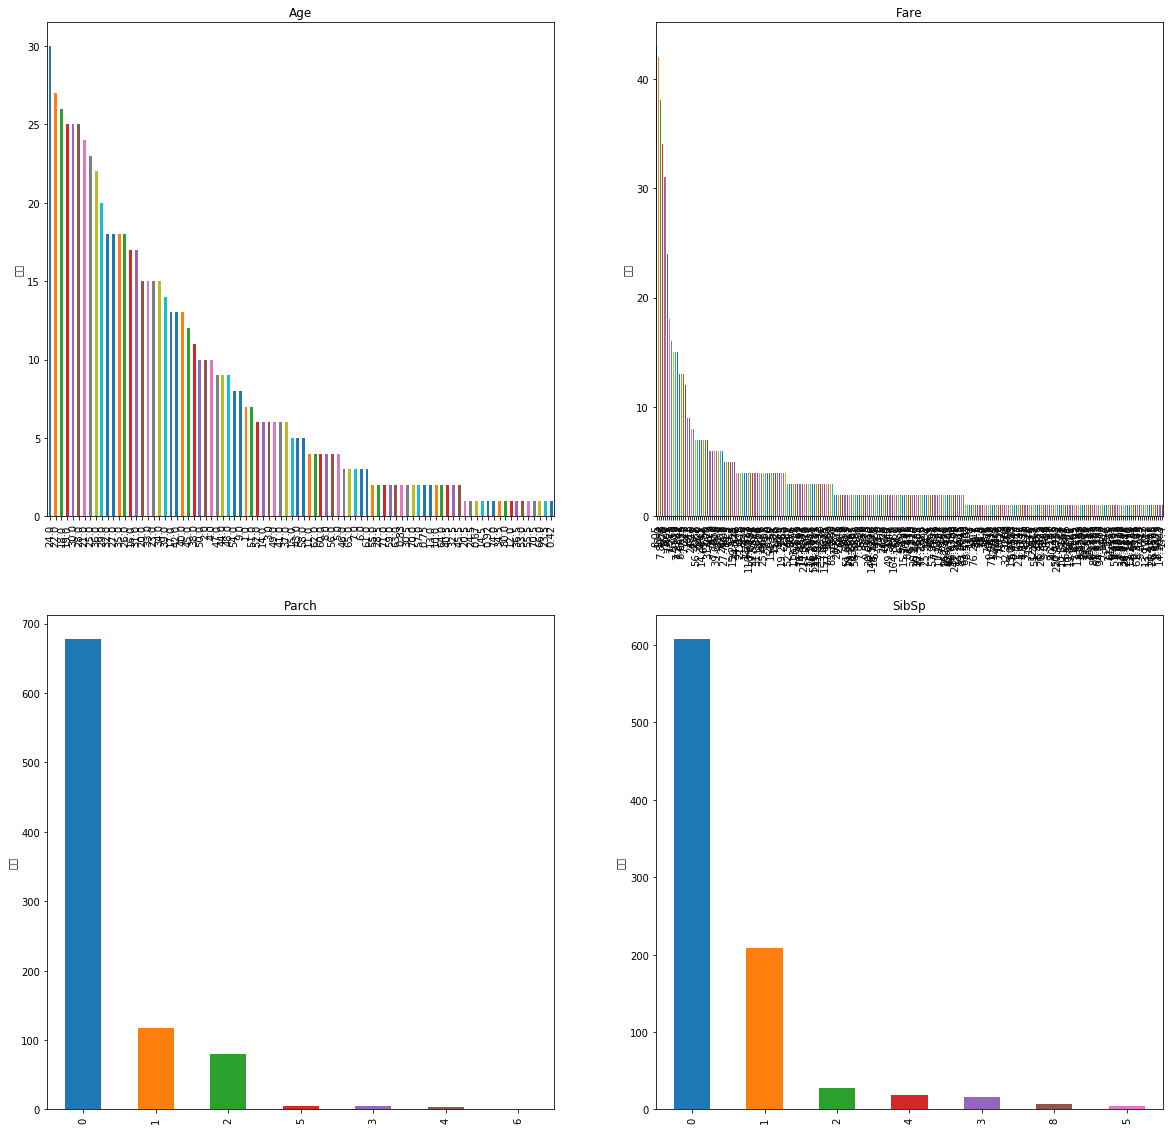

In [18]:
plt.figure(figsize=(20,20)) 
plt.subplot2grid((2,2),(0,0))
data_train.Age.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"Age")

plt.subplot2grid((2,2),(0,1))
data_train.Fare.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"Fare")

plt.subplot2grid((2,2),(1,0))
data_train.Parch.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"Parch")

plt.subplot2grid((2,2),(1,1))
data_train.SibSp.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"SibSp")

由图知Parch和SibSp取值少，分布不均，不适合作为连续值处理

**相关性分析**

Text(0.5,1,'Parch')

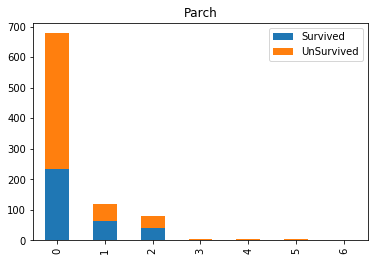

In [36]:
parch_survived0=data_train['Parch'][data_train.Survived==0].value_counts()
parch_survived1=data_train['Parch'][data_train.Survived==1].value_counts()
df=DataFrame({'Survived':parch_survived1,'UnSurvived':parch_survived0})
df.plot(kind='bar',stacked=True)
plt.title('Parch')

Text(0.5,1,'SibSp')

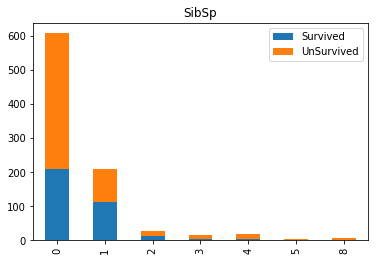

In [39]:
SibSp_survived0=data_train['SibSp'][data_train.Survived==0].value_counts()
SibSp_survived1=data_train['SibSp'][data_train.Survived==1].value_counts()
df=DataFrame({'Survived':SibSp_survived1,'UnSurvived':SibSp_survived0})
df.plot(kind='bar',stacked=True)
plt.title('SibSp')

Parch/Sib和Survived是具有相关性的，在有3个旁系亲属或者3个直系情况下生还概率会急剧下降

Text(0.5,1,'Pclass')

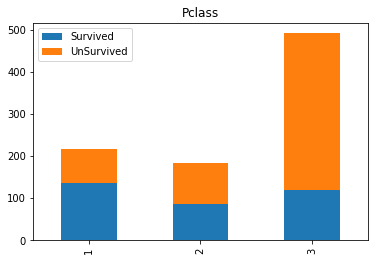

In [40]:
Pclass_survived0=data_train['Pclass'][data_train.Survived==0].value_counts()
Pclass_survived1=data_train['Pclass'][data_train.Survived==1].value_counts()
df=DataFrame({'Survived':Pclass_survived1,'UnSurvived':Pclass_survived0})
df.plot(kind='bar',stacked=True)
plt.title('Pclass')

Text(0.5,1,'Embarked')

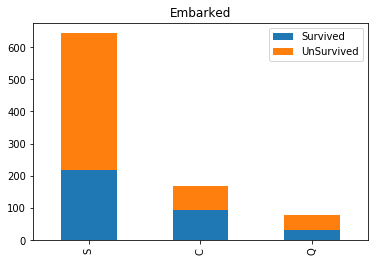

In [42]:
Embarked_survived0=data_train['Embarked'][data_train.Survived==0].value_counts()
Embarked_survived1=data_train['Embarked'][data_train.Survived==1].value_counts()
df=DataFrame({'Survived':Embarked_survived1,'UnSurvived':Embarked_survived0})
df.plot(kind='bar',stacked=True)
plt.title('Embarked')

Text(0.5,1,'Sex')

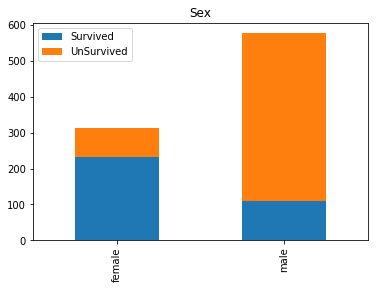

In [43]:
Sex_survived0=data_train['Sex'][data_train.Survived==0].value_counts()
Sex_survived1=data_train['Sex'][data_train.Survived==1].value_counts()
df=DataFrame({'Survived':Sex_survived1,'UnSurvived':Sex_survived0})
df.plot(kind='bar',stacked=True)
plt.title('Sex')

**数据预处理**

缺失值处理方法
#拟合：缺失个数不多时，并且有背景特征可以使用时。
#填充：缺失数据不多，而且数据可以离散化数据（连续数据考虑step为离散化），直接填充NaN新类型或者使用均值、中值。
#0/1化：当是否有记录本身就有意义时，可以考虑将是否有数据作为一个特征。
#丢弃：缺失数据过多时为避免引入噪声，可以直接丢弃。

#Age: 年龄缺失1/4，采取Step(采用5年，由于数据量不大，避免过于分散)离散化+填充NaN新类型的方法。
#客舱Cabin: 缺失3/4，因为船舱可能和身份有关，所以直接使用0/1化。
#登录港口Embarked：登录港口缺失少量数据，直接填充为最常见类型。

In [171]:
filled_data=data_train.copy()

filled_data['CategoricalAge'] = pd.cut(filled_data['Age'], 5)
print(filled_data.groupby('CategoricalAge')['Survived'].mean())
filled_data.loc[ filled_data['Age'] <= 16, 'Age'] = 0
filled_data.loc[(filled_data['Age'] > 16) & (filled_data['Age'] <= 32), 'Age'] = 1
filled_data.loc[(filled_data['Age'] > 32) & (filled_data['Age'] <= 48), 'Age'] = 2
filled_data.loc[(filled_data['Age'] > 48) & (filled_data['Age'] <= 64), 'Age'] = 3
filled_data.loc[ filled_data['Age'] > 64, 'Age']= 4
filled_data.loc[ filled_data['Age'].isnull(), 'Age']= 5
filled_data['Age'] = filled_data['Age'].astype(int)

filled_data.loc[data_train.Cabin.notnull(),'Cabin']=1
filled_data.loc[data_train.Cabin.isnull(),'Cabin']=0

filled_data.loc[data_train.Embarked.isnull(),'Embarked']=data_train.Embarked.value_counts().axes[0][0]



CategoricalAge
(0.34, 16.336]      0.550000
(16.336, 32.252]    0.369942
(32.252, 48.168]    0.404255
(48.168, 64.084]    0.434783
(64.084, 80.0]      0.090909
Name: Survived, dtype: float64


In [172]:
dummy_Cabin=pd.get_dummies(filled_data.Cabin,prefix='Cabin')
dummy_Sex=pd.get_dummies(filled_data.Sex,prefix='Sex')
dummy_Embarked=pd.get_dummies(filled_data.Embarked,prefix='Embarked')
dummy_Pclass=pd.get_dummies(filled_data.Pclass,prefix='Pclass')


new_train_data=pd.concat([filled_data,dummy_Cabin,dummy_Sex,dummy_Embarked,dummy_Pclass],axis=1)
new_train_data.drop(['PassengerId','Name','Ticket','Cabin','Sex','Embarked','Pclass','CategoricalAge'],axis=1,inplace=True)

new_train_data.head()

,Survived,Age,SibSp,Parch,Fare,Cabin_0,Cabin_1,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,1,0,7.2500,1,0,0,1,0,0,1,0,0,1
1,1,2,1,0,71.2833,0,1,1,0,1,0,0,1,0,0
2,1,1,0,0,7.9250,1,0,1,0,0,0,1,0,0,1
3,1,2,1,0,53.1000,0,1,1,0,0,0,1,1,0,0
4,0,2,0,0,8.0500,1,0,0,1,0,0,1,0,0,1


将Fare数据进行归一化（收敛速度）

In [173]:
from sklearn.preprocessing import StandardScaler
new_train_data['Fare']=StandardScaler().fit_transform(new_train_data.filter(['Fare']))

new_train_data.head()

,Survived,Age,SibSp,Parch,Fare,Cabin_0,Cabin_1,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,1,0,-0.502445,1,0,0,1,0,0,1,0,0,1
1,1,2,1,0,0.786845,0,1,1,0,1,0,0,1,0,0
2,1,1,0,0,-0.488854,1,0,1,0,0,0,1,0,0,1
3,1,2,1,0,0.420730,0,1,1,0,0,0,1,1,0,0
4,0,2,0,0,-0.486337,1,0,0,1,0,0,1,0,0,1


对测试数据做同样的预处理

In [182]:
data_test=pd.read_csv(r"D:\thf\python\kaggle\Titanic\test.csv")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [185]:
data_test.loc[data_train.Cabin.notnull(),'Cabin']=1
data_test.loc[data_train.Cabin.isnull(),'Cabin']=0

data_test.loc[data_test.Fare.isnull(),'Fare']=0

data_test.loc[ data_test['Age'] <= 16, 'Age'] = 0
data_test.loc[(data_test['Age'] > 16) & (data_test['Age'] <= 32), 'Age'] = 1
data_test.loc[(data_test['Age'] > 32) & (data_test['Age'] <= 48), 'Age'] = 2
data_test.loc[(data_test['Age'] > 48) & (data_test['Age'] <= 64), 'Age'] = 3
data_test.loc[ data_test['Age'] > 64, 'Age']= 4
data_test.loc[ data_test['Age'].isnull(), 'Age']= 5
data_test['Age'] = data_test['Age'].astype(int)

data_test['Fare']=StandardScaler().fit_transform(data_test.filter(['Fare']))

dummy_Cabin=pd.get_dummies(data_test.Cabin,prefix='Cabin')
dummy_Sex=pd.get_dummies(data_test.Sex,prefix='Sex')
dummy_Embarked=pd.get_dummies(data_test.Embarked,prefix='Embarked')
dummy_Pclass=pd.get_dummies(data_test.Pclass,prefix='Pclass')


new_test_data=pd.concat([data_test,dummy_Cabin,dummy_Sex,dummy_Embarked,dummy_Pclass],axis=1)
new_test_data.drop(['PassengerId','Name','Ticket','Cabin','Sex','Embarked','Pclass'],axis=1,inplace=True)

new_test_data.head()

,Age,SibSp,Parch,Fare,Cabin_0,Cabin_1,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,0,-0.496637,1,0,0,1,0,1,0,0,0,1
1,0,1,0,-0.511497,0,1,1,0,0,0,1,0,0,1
2,0,0,0,-0.463335,1,0,0,1,0,1,0,0,1,0
3,0,0,0,-0.481704,0,1,0,1,0,0,1,0,0,1
4,0,1,1,-0.416740,1,0,1,0,0,0,1,0,0,1


**逻辑回归建模**

In [186]:
from sklearn.linear_model import LogisticRegression

X=new_train_data.as_matrix()[:,1:]
y=new_train_data.as_matrix()[:,0]

logre=LogisticRegression()
logre.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

交叉验证

In [187]:
from sklearn import cross_validation

y=new_train_data['Survived']
X=new_train_data.drop('Survived',axis=1)

print(np.mean(cross_validation.cross_val_score(logre,X,y,cv=5)))

0.793538625435


In [188]:
predictions=logre.predict(new_test_data.as_matrix()[:,:])

results=pd.DataFrame({'PassengerId':data_test.PassengerId.as_matrix(),'Survived':predictions.astype(np.int32)})

results.to_csv(r"D:\thf\python\kaggle\Titanic\predictions_logre.csv",index=False)

得分 0.72

**优化模型**

In [192]:
pd.DataFrame({'columns':list(new_train_data.columns)[1:],'coef':list(logre.coef_.T)}).sort_values(by='coef')

,coef,columns
7,[-1.13073639964],Sex_male
13,[-0.534449827477],Pclass_3
10,[-0.280867983019],Embarked_S
4,[-0.248930553855],Cabin_0
1,[-0.237673064187],SibSp
0,[-0.182439389806],Age
2,[-0.128878319418],Parch
3,[0.125027019343],Fare
8,[0.296007578865],Embarked_C
9,[0.35868747836],Embarked_Q


**增加特征**

In [198]:
new_train_data['FamilySize']=new_train_data.Parch+new_train_data.SibSp
new_train_data['Single']=new_train_data.Parch.apply(lambda x:1 if x==0 else 0)
X=new_train_data.as_matrix()[:,1:]
y=new_train_data.as_matrix()[:,0]

logre=LogisticRegression()
logre.fit(X,y)

y=new_train_data['Survived']
X=new_train_data.drop('Survived',axis=1)

print(np.mean(cross_validation.cross_val_score(logre,X,y,cv=5)))


0.79916922803


In [200]:
new_test_data['FamilySize']=new_test_data.Parch+new_test_data.SibSp
new_test_data['Single']=new_test_data.Parch.apply(lambda x:1 if x==0 else 0)

predictions=logre.predict(new_test_data.as_matrix()[:,:])

results=pd.DataFrame({'PassengerId':data_test.PassengerId.as_matrix(),'Survived':predictions.astype(np.int32)})

results.to_csv(r"D:\thf\python\kaggle\Titanic\predictions_logre1.csv",index=False)

得分0.74

**learning curve**

(0.79675115698406895, 0.029473070781430577)

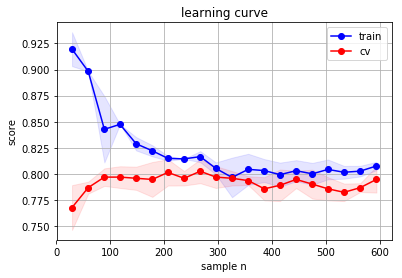

In [204]:
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel('sample n')
        plt.ylabel('score')
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='train')
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="cv")

        plt.legend(loc="best")

        plt.draw()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(logre, 'learning curve', X, y)